# Propagación de la afinidad

Algoritmo de clustering mediante paso de mensajes.<br><br>

Necesitamos:
* Matriz de similaridad: Inversas de las distancias (Cuando mayor distancia menor similaridad)
$$ s(i,k) = \frac{1}{d(i, k)} $$
* Matriz de responsabilidad (r(i, k))
* Matriz de disponibilidad (a(i, k))

Se inicializan las matrices de disponibilidad y responsabilidad a 0.<br>
Calculamos las responsabilidades y disponibilidades para los pares de elementos.
$$ r(i, k) = s(i, k) - max_{j \neq k}(a(i, j) + s(i, j))$$
$$ a(i, k) = min(0, r(k, k) + \sum_{j \not\in {i, k}}{max(0, r(j, k))})$$
$$ a(k, k) = \sum_{j \neq k}{max(0, r(j, k))} $$
<br>
Las responsabilidades irán decayendo y cuando no haya mucha variación paramos de iterar la transferencia de mensajes.

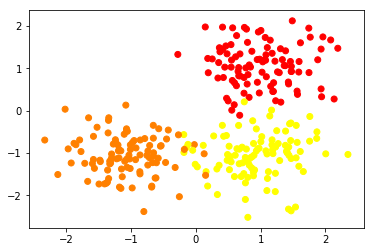

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle

%matplotlib inline

centers = [[1, 1], [-1, -1], [1, -1]]

X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)
plt.scatter(X[:,0], X[:,1], c=labels, cmap="autumn")

In [2]:
af = AffinityPropagation(preference=-50).fit(X)
#Puntos que actuan como centros:
af.cluster_centers_indices_

array([160, 250, 272])

In [3]:
af.cluster_centers_

array([[ 1.03325861,  1.15123595],
       [ 0.93494652, -0.95302339],
       [-1.18459092, -1.11968959]])

In [6]:
#Porcentaje de elementos bien clasificados
metrics.homogeneity_score(labels, af.labels_)

0.87155952983851337

In [8]:
#Completitud
metrics.completeness_score(labels, af.labels_)

0.87158597533741955

In [10]:
#V-measure
metrics.v_measure_score(labels, af.labels_)

0.87157275238736232

In [12]:
#R2
metrics.adjusted_rand_score(labels, af.labels_)

0.91196260804319662

In [14]:
#Información mutua ajustada
metrics.adjusted_mutual_info_score(labels, af.labels_)

0.87076822451140667

In [16]:
#Coeficiente de la silueta
metrics.silhouette_score(X, labels, metric="sqeuclidean")

0.73495075125515841

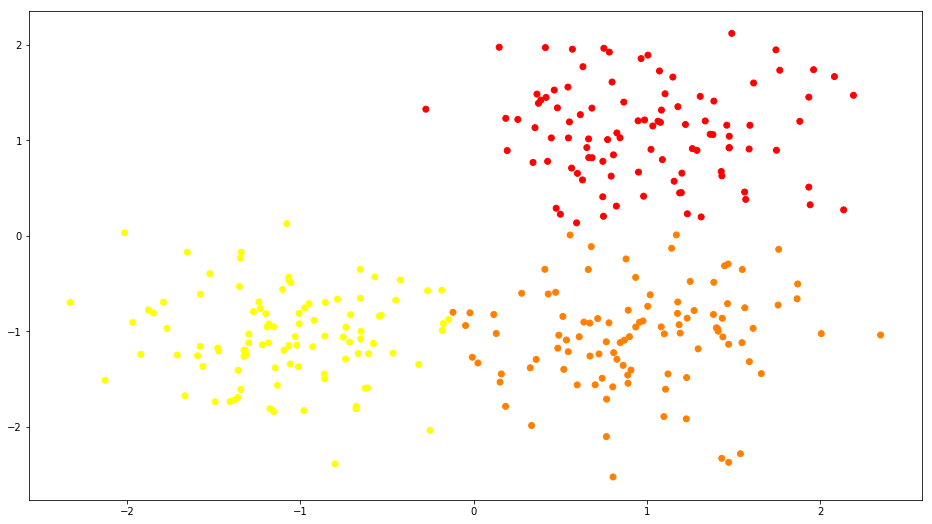

In [23]:
plt.figure(figsize=(16, 9))
plt.scatter(X[:,0], X[:,1], c=af.labels_, cmap="autumn")